### 2024SummerSchool Homework(Due to the limitations of the level and experimental environment, only part of the content can be completed)

### Using Sobel in OpenCV-Python

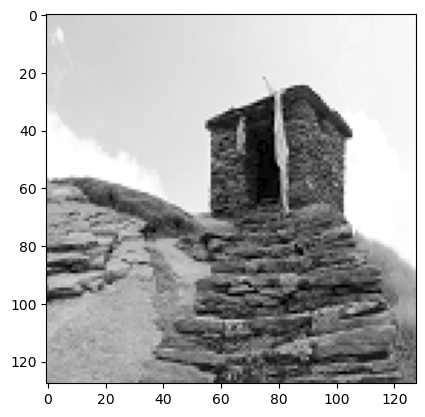

In [9]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np
import time
import copy 
gray = cv.imread("./128x128.png",cv.IMREAD_GRAYSCALE)
plt.imshow(gray,cmap="gray")

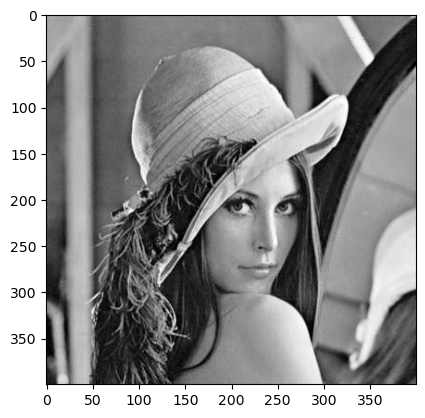

In [7]:
gray2 = cv.imread("./lena.jpg", cv.IMREAD_GRAYSCALE)   #size:400x400
plt.imshow(gray2, cmap="gray")

Time cost with software: 0.0020003318786621094s


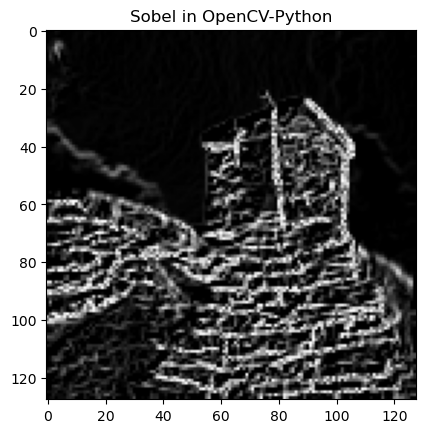

In [12]:
#apply sobel filter to get the gradients in X and Y direction
start_time_python = time.time()

Gx = cv.Sobel(gray, cv.CV_16U, 1, 0 ,ksize=3)
Gy = cv.Sobel(gray, cv.CV_16U, 0, 1 ,ksize=3)


G = np.sqrt(Gx**2 + Gy**2)
G_python = G.astype(np.uint8)

end_time_python = time.time()

time_python = end_time_python - start_time_python

print("Time cost with software: {}s".format(time_python))

plt.title("Sobel in OpenCV-Python")
plt.imshow(G_python, cmap = "gray")

Time cost with software: 0.002173900604248047s


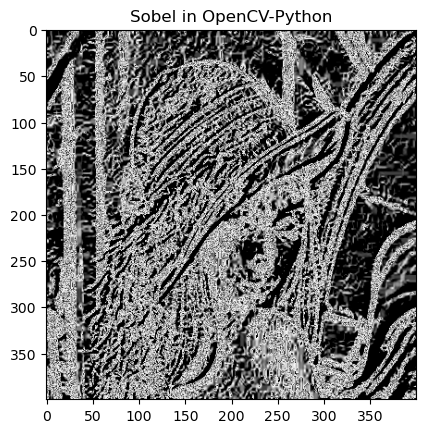

In [18]:
start_time_python = time.time()

Gx_2 = cv.Sobel(gray2, cv.CV_16U, 1, 0 ,ksize=5)
Gy_2 = cv.Sobel(gray2, cv.CV_16U, 0, 1 ,ksize=5)
G2 = np.sqrt(Gx_2**2 + Gy_2**2)
G_python_2 = G2.astype(np.uint8)
end_time_python = time.time()
time_python = end_time_python - start_time_python

print("Time cost with software: {}s".format(time_python))

plt.title("Sobel in OpenCV-Python")
plt.imshow(G_python_2, cmap = "gray")

Using Hand-Coded Sobel Hardware Accelerated Kernel

In [6]:
from pynq import Overlay,allocate

overlay = Overlay("./my_sobel_opt_kv260.bit")
sobel = overlay.sobel_0

#allocate memory
rows, cols = gray.shape
input_buffer = allocate(shape=(rows*cols,),dtype = 'u1')
output_buffer = allocate(shape=(rows*cols,),dtype = 'u1')

#input
gray_new = np.uint8(gray)
np.copyto(input_buffer, gray_new.flatten())

ModuleNotFoundError: No module named 'pynq'